## Let's connect it to Google Drive first so our file can be hosted there automatically.




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding the Dataset and Data Quality

### 1. How many rows and columns are in this dataset?

In [5]:
#import the pandas library first
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/TPH Data Analysis/church_chat.csv")

#Find out the number of rows
num_rows, num_columns = df.shape

# Print the results
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

The dataset contains 18827 rows and 4 columns.


In [6]:
df.head()

,Date,Time,Sender,Message
0,11/12/2024,23:18,Alade Ngbede Sunday,Is this even necessary 😭\nHabaaaa woman of God...
1,11/12/2024,23:19,Gracie TPH 💟💟,"Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ..."
2,11/12/2024,23:20,Daleng TPH,Food for the stomach and stomach for the food ...
3,11/12/2024,23:21,Ben Kelechi TPH,😂😂guyyy😭
4,11/12/2024,23:21,Gracie TPH 💟💟,<Media omitted>


### 2. What are the data types of each column?

In [7]:
data_types = df.dtypes

# Print the data types
print(data_types)

Date       object
Time       object
Sender     object
Message    object
dtype: object



I have to convert the datatypes of Date and Time Columns

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # from DD/MM/YYYY
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Check the new dtypes
print(df.dtypes)

Date       datetime64[ns]
Time       datetime64[ns]
Sender             object
Message            object
dtype: object


### 3. Let's find out the date range for this dataset. i.e find the minimum and maximum date for this dataset

In [9]:
min_date = df['Date'].min()
max_date = df['Date'].max()

# Print the date range
print(f'The date range for the dataset is from {min_date.date()} to {max_date.date()}.')

The date range for the dataset is from 2024-12-11 to 2025-04-19.


### 4. Are there any irrelevant columns in the dataset?

No. They’re all relevant.

1. Date:	For tracking daily activity, trends, spikes
2. Time:	For hourly patterns, peak chat times
3. Sender:	To identify top participants
4. Message:	For content, sentiment, topic analysis

### 5. Are there irrelevant rows?

Yes, a few of them.

1. Rows with "Media omitted" or system messages (like "You added XYZ").

2. Messages with null or empty values.

3. Rows like "word count" or "emoji count" won't be needed.

In [10]:
df.head()

,Date,Time,Sender,Message
0,2024-12-11,NaT,Alade Ngbede Sunday,Is this even necessary 😭\nHabaaaa woman of God...
1,2024-12-11,NaT,Gracie TPH 💟💟,"Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ..."
2,2024-12-11,NaT,Daleng TPH,Food for the stomach and stomach for the food ...
3,2024-12-11,NaT,Ben Kelechi TPH,😂😂guyyy😭
4,2024-12-11,NaT,Gracie TPH 💟💟,<Media omitted>


My Time column looks fine in the raw .csv, but shows NaT in Python after conversion.

-- This means:

Pandas tried to convert the Time column to datetime but failed, so it replaced the values with NaT (Not a Time).

-- Why It's Happening

The CSV Time Column Was Likely Misread or Replaced on Load.
When i originally loaded the CSV, it seems the Time column was automatically parsed or corrupted into NaT. So, let's fix it.

-- Reload the CSV With Care

Let’s go fresh and manually tell Pandas not to parse anything:

In [11]:
df = pd.read_csv("/content/drive/My Drive/TPH Data Analysis/church_chat.csv", dtype=str, keep_default_na=False)


In [12]:
print(df['Time'].head(10))  # See what Time actually looks like now


0    23:18
1    23:19
2    23:20
3    23:21
4    23:21
5    23:21
6    00:36
7    00:37
8    03:55
9    03:58
Name: Time, dtype: object


In [13]:
#Then, let's change it to a proper datetime.time dtype.
df['Time'] = df['Time'].str.strip()
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [14]:
df.head()

,Date,Time,Sender,Message
0,11/12/2024,23:18:00,Alade Ngbede Sunday,Is this even necessary 😭\nHabaaaa woman of God...
1,11/12/2024,23:19:00,Gracie TPH 💟💟,"Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ..."
2,11/12/2024,23:20:00,Daleng TPH,Food for the stomach and stomach for the food ...
3,11/12/2024,23:21:00,Ben Kelechi TPH,😂😂guyyy😭
4,11/12/2024,23:21:00,Gracie TPH 💟💟,<Media omitted>


In [15]:
df.dtypes

,0
Date,object
Time,object
Sender,object
Message,object


Now that these columns are a regular string (object) datatype, we can cleanly convert it into a usable format.

Step 1: Convert Date to datetime64[ns]

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')



Step 2: Keep Sender and Message as Strings
These don’t need conversion, but we’ll make sure they’re string type

In [17]:
df['Sender'] = df['Sender'].astype(str)
df['Message'] = df['Message'].astype(str)


In [18]:
print(df.dtypes)
print(df.head())


Date       datetime64[ns]
Time               object
Sender             object
Message            object
dtype: object
        Date      Time               Sender  \
0 2024-12-11  23:18:00  Alade Ngbede Sunday   
1 2024-12-11  23:19:00        Gracie TPH 💟💟   
2 2024-12-11  23:20:00           Daleng TPH   
3 2024-12-11  23:21:00      Ben Kelechi TPH   
4 2024-12-11  23:21:00        Gracie TPH 💟💟   

                                             Message  
0  Is this even necessary 😭\nHabaaaa woman of God...  
1  Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ...  
2  Food for the stomach and stomach for the food ...  
3                                           😂😂guyyy😭  
4                                    <Media omitted>  


### 6. Which columns have missing data?

In [19]:
print(df.isnull().sum())


Date       0
Time       0
Sender     0
Message    0
dtype: int64


Message column has missing values.

Let's See Unique Rows with Missing Messages (No Duplicates)

In [20]:
missing_messages_unique = df[df['Message'].isnull()].drop_duplicates()
print(missing_messages_unique)


Empty DataFrame
Columns: [Date, Time, Sender, Message]
Index: []


Let’s dig into why those Message values are showing up as NaN and how we can analyze what's behind them.

Step 1: Let's view the Raw Rows with Missing Messages

In [21]:
print(df[df['Message'].isnull()])


Empty DataFrame
Columns: [Date, Time, Sender, Message]
Index: []


This means there are no blank names, or blank dates, these are messages that were actually sent by real people.

Step 2: Check for Emoji-Only Messages

Sometimes emoji-only messages get lost due to encoding issues. Let’s try this:

But let's install emoji module first to see whuch of our Messages rows have emoji

In [22]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00


In [23]:
import emoji

# Check rows where messages are NOT missing but MAY contain only emojis
emoji_only = df[df['Message'].notnull() & df['Message'].str.fullmatch(r'[^\w\s,.:;!?()\[\]\'\"\n\r\t0-9]+')]
print(emoji_only.head(10))


          Date      Time                  Sender   Message
39  2024-12-12  11:08:00  Ms. Mowaninuola Meghan       😂😂😂
184 2024-12-12  22:06:00       +234 814 532 1728    😅🤣😂😂😂😂
248 2024-12-12  22:21:00               Awodi TPH  😂😂😂😭😭😭💔💔
272 2024-12-12  22:24:00       +234 906 525 1780         😎
307 2024-12-12  22:29:00       +234 706 284 7575        😂😂
360 2024-12-12  22:39:00               Awodi TPH   😂😂😂😂😂💔💔
425 2024-12-13  09:37:00    STANLEY Bishop DAVID       😂😂😂
429 2024-12-13  09:42:00       +234 802 220 8366       😂😂😂
436 2024-12-13  09:50:00        Bilkisu Maikudi🌺        😂😂
695 2024-12-14  11:03:00                Thompson     😂😂😂😂😂


Obviously, emoji-only messages are not the cause of the NaNs.

So, Let’s Filter Messages Like:
- "Media omitted"

- "This message was deleted"

- Or just messages that ended up as NaN

In [24]:
# Messages that were system media or deleted
media_or_deleted = df[
    df['Message'].isnull() |
    df['Message'].str.contains('media omitted|this message was deleted', case=False, na=False)
]

print(f"Total number of messages that are system/deleted/media messages: {len(media_or_deleted)}")


Total number of messages that are system/deleted/media messages: 3337


Let's drop these system media or deleted messages.

In [25]:
df = df[~(
    df['Message'].isnull() |
    df['Message'].str.contains('media omitted|this message was deleted', case=False, na=False)
)]


In [26]:
print(df.isnull().sum())


Date       0
Time       0
Sender     0
Message    0
dtype: int64


Now, there are no NaN values.

In [27]:
print(df.head(10))

         Date      Time                Sender  \
0  2024-12-11  23:18:00   Alade Ngbede Sunday   
1  2024-12-11  23:19:00         Gracie TPH 💟💟   
2  2024-12-11  23:20:00            Daleng TPH   
3  2024-12-11  23:21:00       Ben Kelechi TPH   
5  2024-12-11  23:21:00   Alade Ngbede Sunday   
8  2024-12-12  03:55:00     +234 817 512 9133   
9  2024-12-12  03:58:00     +234 703 586 1866   
10 2024-12-12  10:13:00                  Alex   
11 2024-12-12  10:21:00  Rotimi Hardeyemi TPH   
12 2024-12-12  10:22:00  Rotimi Hardeyemi TPH   

                                              Message  
0   Is this even necessary 😭\nHabaaaa woman of God...  
1   Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ...  
2   Food for the stomach and stomach for the food ...  
3                                            😂😂guyyy😭  
5   I bless the day food was made o\nI bless the f...  
8   An appreciation post:\n\nI want to take a mome...  
9   Pray about EVERYTHING 🤲\n\nPhil.4.6 Don't worr...  
10  Good mor

In [28]:
df.head()

,Date,Time,Sender,Message
0,2024-12-11,23:18:00,Alade Ngbede Sunday,Is this even necessary 😭\nHabaaaa woman of God...
1,2024-12-11,23:19:00,Gracie TPH 💟💟,"Sorry 🤭🤭🤭\n11/12/2024, 23:20 - Daleng TPH was ..."
2,2024-12-11,23:20:00,Daleng TPH,Food for the stomach and stomach for the food ...
3,2024-12-11,23:21:00,Ben Kelechi TPH,😂😂guyyy😭
5,2024-12-11,23:21:00,Alade Ngbede Sunday,I bless the day food was made o\nI bless the f...


Let's see the number of rows we have left:

In [29]:
df = pd.read_csv("/content/drive/My Drive/TPH Data Analysis/church_chat_clean.csv")

#Find out the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

The dataset contains 15349 rows and 4 columns.


### 7. Are there duplicate records?

Step 1: Check for Completely Duplicate Rows

This checks if all four columns (Date, Time, Sender, Message) are exactly the same in more than one row.

In [30]:
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")


Total duplicate rows: 71


Step 2: View Some of the Duplicates.

In [31]:
(duplicate_rows.head(20))


,Date,Time,Sender,Message
1624,2024-12-18,21:22:00,+234 912 917 4208,We listen we don't judge
1678,2024-12-19,08:31:00,+234 706 055 1193,Happy birthday ma'am
1683,2024-12-19,08:37:00,+234 916 110 7540,Happy birthday dear 😊
1709,2024-12-19,09:47:00,Ejay Tph,Happy birthday ma'am 🎉
1725,2024-12-19,09:59:00,+234 704 088 7372,Happy birthday
2278,2024-12-23,09:08:00,Jemimah Maikudi,Happy Birthday Ma!🎉
2291,2024-12-23,09:30:00,+234 906 355 8217,Happy birthday ma 🎊
2292,2024-12-23,09:30:00,+234 916 110 7540,Happy birthday ma 🥳🎉
2296,2024-12-23,09:33:00,Bettyjac Tph,"Happy birthday ma, God bless you immensely 🙏🏽🙏..."
2327,2024-12-23,12:19:00,+234 813 744 8301,Happy birthday ma 🎉


Most of the duplicated messages are Happy Birthday messages. So, they are valid.

It shows that:

- People often repeat similar greetings.

- These duplicates reflect natural group behavior, not data errors.

Step 3: Check Duplicates Based on Only Key Columns

Let's find duplicates just based on Date, Time, and Sender (ignoring minor message changes):

In [32]:
dupes_partial = df[df.duplicated(subset=['Date', 'Time', 'Sender'])]
print(f"Partial duplicates (Date, Time, Sender): {len(dupes_partial)}")


Partial duplicates (Date, Time, Sender): 2037


Let's see how often repeated greetings show up.

In [33]:
df['IsDuplicate'] = df.duplicated(keep=False)


 And analyze repeated messages like:

In [34]:
(df[df['IsDuplicate']].groupby('Message').size().sort_values(ascending=False).head(10))

,0
Message,
Happy birthday ma,15
Happy birthday ma 🎊,8
Happy birthday ma'am,8
Welcome sir,6
Happy Birthday Ma'am 🎉🎉,5
Thank you,5
📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌📌,4
Merry birthday dear Sister... Cheers!,4
Happy birthday Sir,4


Let's Explore Greeting Behavior

This gives:

- How often birthdays are mentioned

- Who the most enthusiastic wishers are 🎂

In [35]:
birthday_msgs = df[df['Message'].str.lower().str.contains('happy birthday')]
print(f"Total birthday wishes: {len(birthday_msgs)}")

top_birthday_senders = birthday_msgs['Sender'].value_counts().head(5)
print(top_birthday_senders)


Total birthday wishes: 3205
Sender
Patricia Tph         76
+234 906 355 8217    74
Sally tph            68
Maram Mary           68
+234 816 650 9713    65
Name: count, dtype: int64


Let's visualize this:

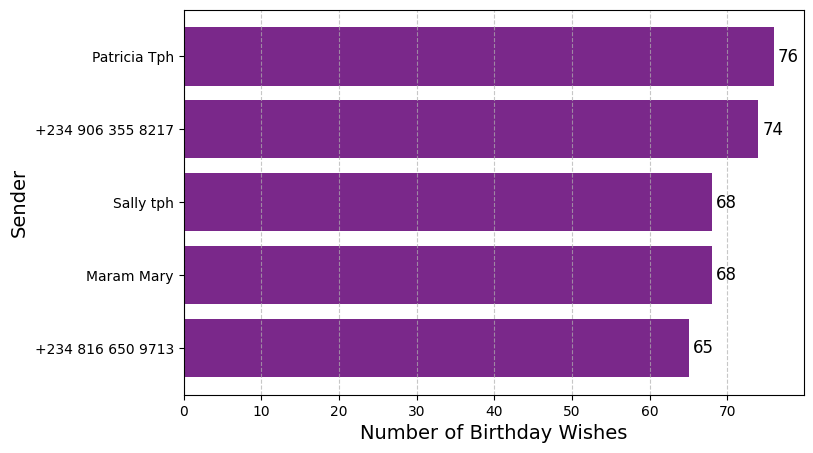

In [36]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(8,5), facecolor='none')  # 'none' makes it transparent
bars = plt.barh(top_birthday_senders.index, top_birthday_senders.values, color='#7A288A')
#plt.title('Top 5 Birthday Wish Senders')
plt.xlabel('Number of Birthday Wishes', fontsize=14)
plt.ylabel('Sender', fontsize=14)
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the numbers on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=12, color='black')

# Save this matplotlib plot to Google Drive
top_birthday_wish_path = '/content/drive/My Drive/TPH Data Analysis/top_wish_senders_plot.png'
plt.savefig(top_birthday_wish_path, format='png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()


## Let's Visualize Common Group Messages with a Word Cloud

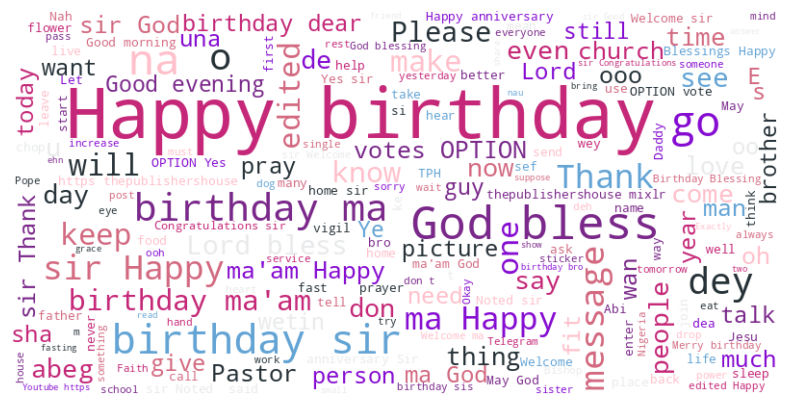

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Custom color palette
color_palette = ['#7A288A', '#FFC0CB', '#263238', '#e9eaeb', '#860cd1', '#c52878', '#d36980', '#63a4d5']

# Custom color function
def custom_color_func(*args, **kwargs):
    return random.choice(color_palette)

# Generate word cloud
text = ' '.join(df['Message'].dropna())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=custom_color_func
).generate(text)

# Plot
plt.figure(figsize=(10, 5), facecolor='none')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save plot
wordcloud_path = '/content/drive/My Drive/TPH Data Analysis/word_cloud_plot.png'
plt.savefig(wordcloud_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


It's visually clear that "Happy birthday," "God bless," "Thank you," "Lord," "Pastor" dominate the conversation.

A joyful, honoring, prayerful, celebratory community, that's the vibe we are getting already.

Now, let's do a sentiment and tone analysis to reflect the culture of our church. i.e

“What does our conversation say about who we are as a spiritual community?”
## SENTIMENT ANALYSIS


Step 1: Sentiment Analysis Code

In [38]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    if pd.isnull(text) or text.strip() == '':
        return None
    return TextBlob(text).sentiment.polarity

# Apply sentiment scoring
df['Sentiment'] = df['Message'].apply(get_sentiment)


Step 2: Classify Tone Based on Sentiment

In [39]:
def classify_tone(polarity):
    if polarity is None:
        return 'Neutral'
    elif polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['Tone'] = df['Sentiment'].apply(classify_tone)


Step 3: Analyze the Results

In [40]:
# Percentage of each tone
tone_distribution = df['Tone'].value_counts(normalize=True) * 100
print(tone_distribution)


Tone
Neutral     61.078898
Positive    36.047951
Negative     2.873151
Name: proportion, dtype: float64


Step 4: Visualize Tone Distribution

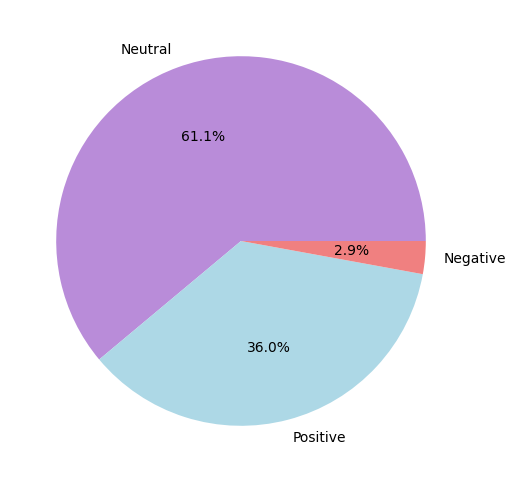

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), facecolor ='none')
tone_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#b98cd9', 'lightblue', 'lightcoral'])
#plt.title('Tone Distribution in Church WhatsApp Group') or What Our Conversations Say About Us
plt.ylabel('')

# Save this matplotlib plot to Google Drive
tone_distribution_path = '/content/drive/My Drive/TPH Data Analysis/tone_distribution.png'
plt.savefig(tone_distribution_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Tone | Percentage | What It Means

Neutral | 61.08% | Most conversations are normal daily talks — coordination, planning, humor, jokes, announcements, information

Positive | 36.00% | A very strong culture of celebration, blessings, encouragement, and good wishes!

Negative | 2.87% | Very low negativity and even this looks more like humor, sarcasm, or friendly teasing than real anger.

# Message Activity Trends


### 1. What are the peak times for message activity in the group?

To find the peak times for when people are most active in the group, we will analyze the 'Hour' each message was sent.

**Step 1: Reload Our CSV with All Columns as Text**

In [42]:
import pandas as pd

# Load everything as plain text
df = pd.read_csv("/content/drive/My Drive/TPH Data Analysis/church_chat_clean.csv", dtype=str)


**Step 2: Let's reconfirm what exactly is inside our Time column:**

In [43]:
print(df['Time'].head(10))
print(df['Time'].dtype)

0    23:18:00
1    23:19:00
2    23:20:00
3    23:21:00
4    23:21:00
5    03:55:00
6    03:58:00
7    10:13:00
8    10:21:00
9    10:22:00
Name: Time, dtype: object
object


**Step 3: Now Extract the Hour**

In [44]:
df['Hour'] = df['Time'].apply(lambda x: int(x.split(":")[0]) if pd.notnull(x) and ":" in x else None)


**Step 4: Let's Print to Verify**

In [45]:
print(df['Hour'].head(10))


0    23
1    23
2    23
3    23
4    23
5     3
6     3
7    10
8    10
9    10
Name: Hour, dtype: int64


**Step 5: Let's see unique hours and their counts.**

In [46]:
print(df['Hour'].value_counts().sort_index())


Hour
0       14
1       12
2       15
3       19
4        9
5       81
6       89
7      286
8     1290
9     1506
10    1308
11    1220
12     686
13     633
14     587
15     710
16     790
17     692
18     582
19     894
20    1353
21    1192
22    1199
23     182
Name: count, dtype: int64


**Step 6: Plot Message Activity by Hour**

What This Will Show Us:
1. Which hour had the most messages (e.g., 9 AM vs 8 PM).

2. Times when group chats are most lively (prayer times, meetings, casual talk times).



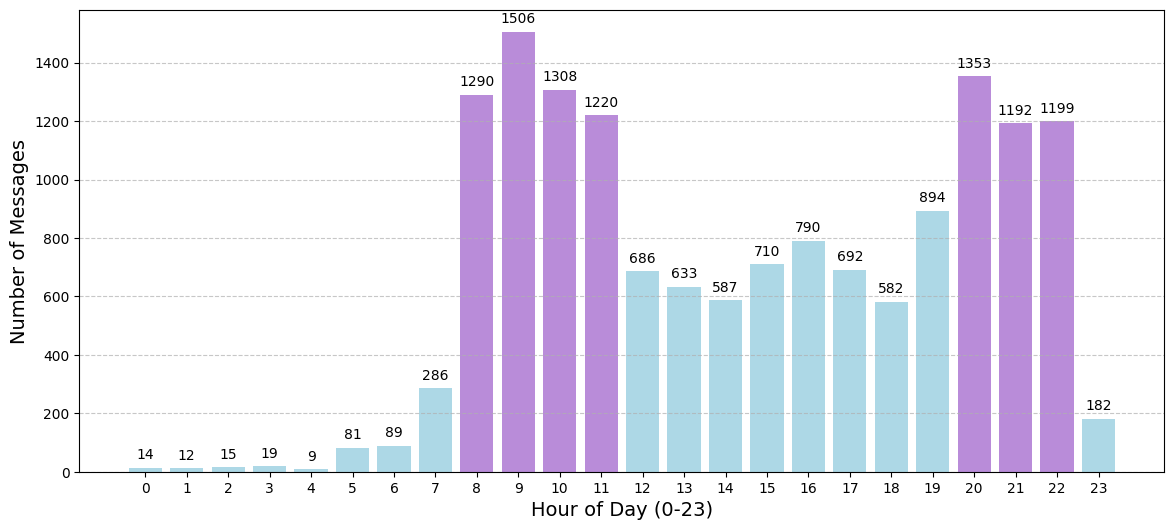

In [47]:
import matplotlib.pyplot as plt

# Step 1: Get Top 7 active hours
hourly_activity = df['Hour'].value_counts().sort_index()  # returns hours 0-23
top_hours = hourly_activity.sort_values(ascending=False).head(7).index.tolist()

# Step 2: Create bar colors using only two specified colors
colors = ['#b98cd9' if hour in top_hours else 'lightblue' for hour in hourly_activity.index]

# Step 3: Plot
plt.figure(figsize=(14,6), facecolor='none')
bars = plt.bar(hourly_activity.index, hourly_activity.values, color=colors)
#plt.title('Message Counts By Hour', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

# Step 4: Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Save this matplotlib plot to Google Drive
msgcount_byhour_path = '/content/drive/My Drive/TPH Data Analysis/msgcount_byhour.png'
plt.savefig(msgcount_byhour_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


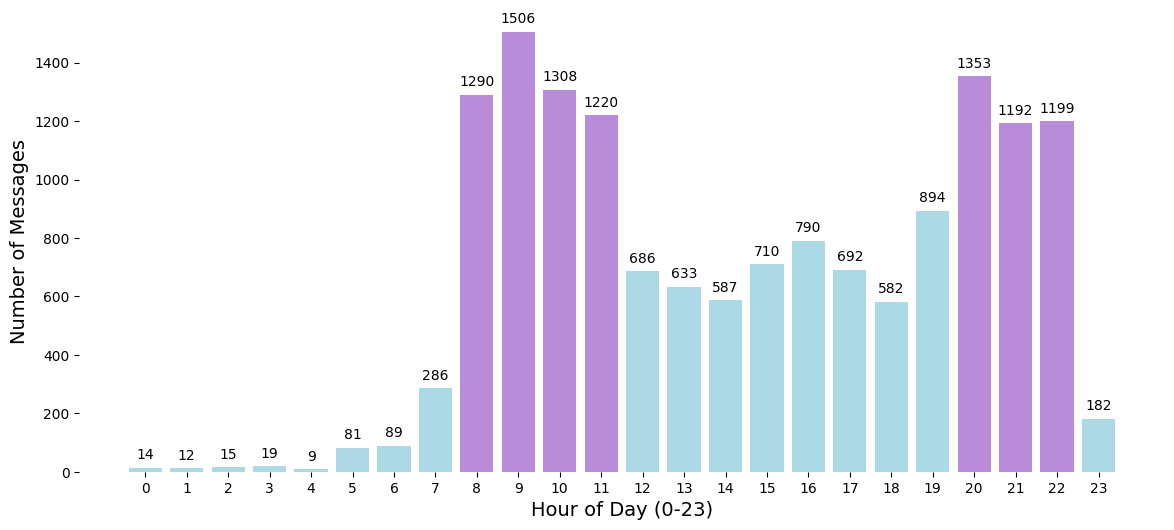

In [48]:
import matplotlib.pyplot as plt

# Step 1: Get Top 7 active hours
hourly_activity = df['Hour'].value_counts().sort_index()  # returns hours 0-23
top_hours = hourly_activity.sort_values(ascending=False).head(7).index.tolist()

# Step 2: Create bar colors using only two specified colors
colors = ['#b98cd9' if hour in top_hours else 'lightblue' for hour in hourly_activity.index]

# Step 3: Plot
plt.figure(figsize=(14,6), facecolor='none')
bars = plt.bar(hourly_activity.index, hourly_activity.values, color=colors)
#plt.title('Message Counts By Hour', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.xticks(rotation=0)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

# Remove border lines
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Step 4: Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Save this matplotlib plot to Google Drive
msg_byhour_path = '/content/drive/My Drive/TPH Data Analysis/msg_byhour.png'
plt.savefig(msg_byhour_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


 ### 2. Are there specific days of the week when message activity is higher?

This helps us identify:

- Peak business days (for planning promotions, availability, etc.)

- Low-activity days (to investigate why)

Step 1: Combine Date and Time into a datetime column

In [49]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

Step 2: Extract the Day of the Week

In [50]:
df['Day_of_Week'] = df['Datetime'].dt.day_name()


Step 3: Count Messages per Day

In [51]:
day_activity = df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


Step 4: Visualize the Results

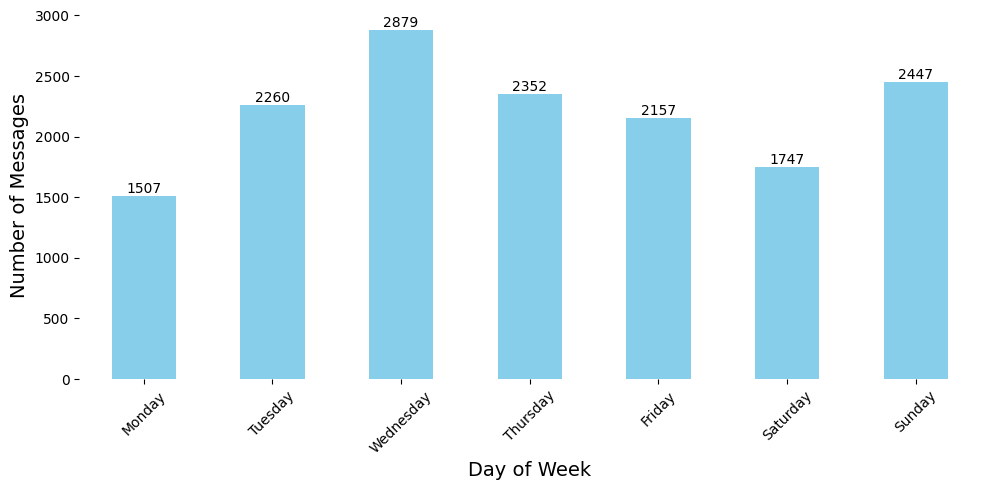

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5), facecolor='none')
ax = day_activity.plot(kind='bar', color='skyblue')
#plt.title('Message Activity by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of each bar
for i, v in enumerate(day_activity):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# Remove border lines
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# Save this matplotlib plot to Google Drive
msg_byday_path = '/content/drive/My Drive/TPH Data Analysis/msg_byday.png'
plt.savefig(msg_byday_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Sender Engagement


### 1. Who are the most active senders in the group?

we can get this by counting the number of messages each sender has contributed.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count messages per sender
sender_counts = df['Sender'].value_counts()

# Step 2: Display the top senders
print("Most Active Senders:")
print(sender_counts)


Most Active Senders:
Sender
P Josh                  965
Zemmy                   880
Sharon                  751
Rotimi Hardeyemi TPH    498
+234 704 331 1441       449
                       ... 
+234 703 756 5597         1
+234 811 968 8252         1
Peace Kadala              1
+234 909 263 7163         1
Victor Gabriel Tph        1
Name: count, Length: 231, dtype: int64


Let's Find and Visualize the Top Seven Senders

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Count messages per sender and get the top 7
sender_counts = df['Sender'].value_counts().head(7)

# Step 3: Display the top 7 senders
print("Top 7 Most Active Senders:")
print(sender_counts)

Top 7 Most Active Senders:
Sender
P Josh                    965
Zemmy                     880
Sharon                    751
Rotimi Hardeyemi TPH      498
+234 704 331 1441         449
+234 814 552 6877         432
Ms. Mowaninuola Meghan    406
Name: count, dtype: int64


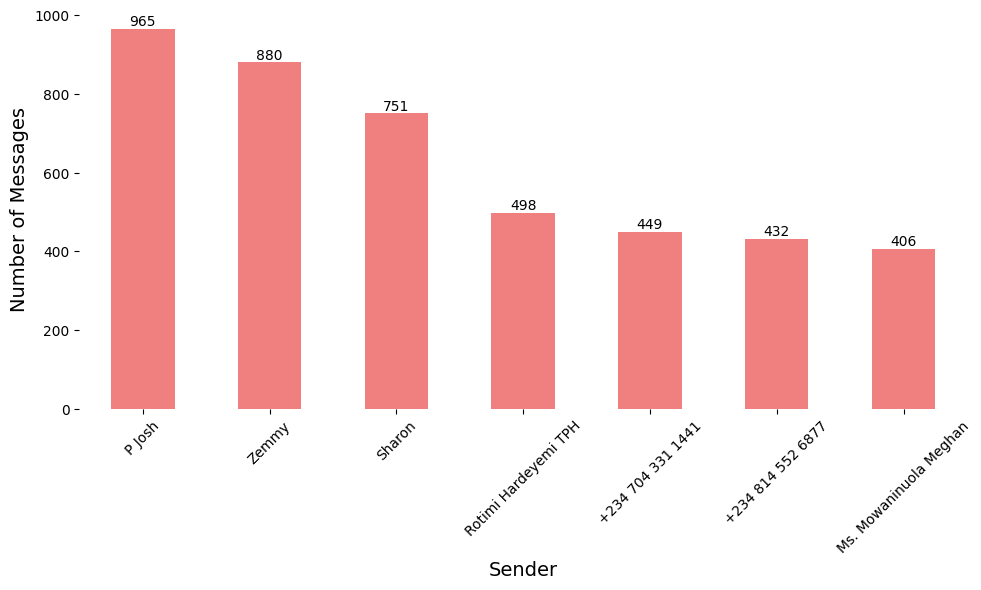

In [55]:
# Step 4: Visualize the top 5 senders with a bar chart
plt.figure(figsize=(10, 6), facecolor='none')
ax = sender_counts.plot(kind='bar', color='lightcoral')
#plt.title('Top 7 Most Active Senders in the Group', fontsize=16)
plt.xlabel('Sender', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of each bar
for i, v in enumerate(sender_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# Remove border lines
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
# Save this matplotlib plot to Google Drive
top7_active_path = '/content/drive/My Drive/TPH Data Analysis/top7_active.png'
plt.savefig(top7_active_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Let's the see top 7 least most active message senders.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Count messages per sender and get the top 7 least active
sender_counts = df['Sender'].value_counts()
least_active_senders = sender_counts.tail(26)  # Get the 7 least active senders
print("Top 7 Least Active Senders:")
print(least_active_senders)


Top 7 Least Active Senders:
Sender
+234 907 767 3610     1
+234 916 299 6259     1
+234 810 396 5232     1
+234 807 071 1406     1
+234 811 167 6222     1
+234 902 687 8034     1
+234 705 085 5831     1
+234 808 057 1734     1
+234 916 134 1314     1
+234 816 694 6838     1
+234 817 362 9777     1
+234 903 972 0571     1
+234 805 057 5898     1
+234 803 532 5392     1
+234 906 582 8980     1
+234 811 094 8849     1
+234 708 959 7941     1
Meta AI               1
+234 912 594 0375     1
+234 904 705 7614     1
+234 703 756 5597     1
+234 903 491 2074     1
+234 811 968 8252     1
Peace Kadala          1
+234 909 263 7163     1
Victor Gabriel Tph    1
Name: count, dtype: int64


##Response Patterns

###1. How quickly do members respond to messages?

What This Answers:

1. Fast or slow repliers? (Are messages replied within 5 mins or hours later?)

2. Group activeness. (Fast replies = high engagement)

3. Time ranges. (e.g., "Most replies happen within 10–15 minutes")

Step 1: Let's make sure our data is sorted

In [57]:
df = df.sort_values('Date')  # Make sure 'date' is your datetime column

Step 2: Shift the sender and timestamp

This helps compare each message with the previous one.

In [58]:
df['prev_sender'] = df['Sender'].shift(1)
df['prev_time'] = df['Date'].shift(1)


Step 3: Calculate response time

In [59]:
df['response_time'] = (df['Date'] - df['prev_time']).dt.total_seconds() / 60  # in minutes


Step 4: Filter only inter-user responses (not same person replying to self)

In [60]:
df_responses = df[df['Sender'] != df['prev_sender']]


Step 5: Analyze response times

In [61]:
# Average response time
avg_response = df_responses['response_time'].mean()

# Median response time (more robust)
median_response = df_responses['response_time'].median()

# Quick summary
print(f"Average response time: {avg_response:.2f} minutes")
print(f"Median response time: {median_response:.2f} minutes")


Average response time: 13.48 minutes
Median response time: 0.00 minutes


This results shows that group responds very quickly on average. Over 50% of responses happen almost immediately, showing high activeness. However, there are occasional slower replies that raise the overall average to 13 minutes."

### 2. Are there specific senders whose messages receive more responses or replies?

Step 1. Calculate Responses to Each Sender's Messages Assuming that each new sender is replying to the previous message.

In [62]:
df['prev_sender'] = df['Sender'].shift(1)
df['response_to'] = df['prev_sender']
df['responded_by'] = df['Sender']

# Remove self-replies
df_responses = df[df['Sender'] != df['prev_sender']].copy()


2. Count How Many Times Each Person Was Replied To.

In [63]:
response_counts = df_responses['response_to'].value_counts()
response_counts = response_counts.rename_axis('Sender').reset_index(name='responses_received')


3. Let's visualize our top 7 senders whose messages get responses.

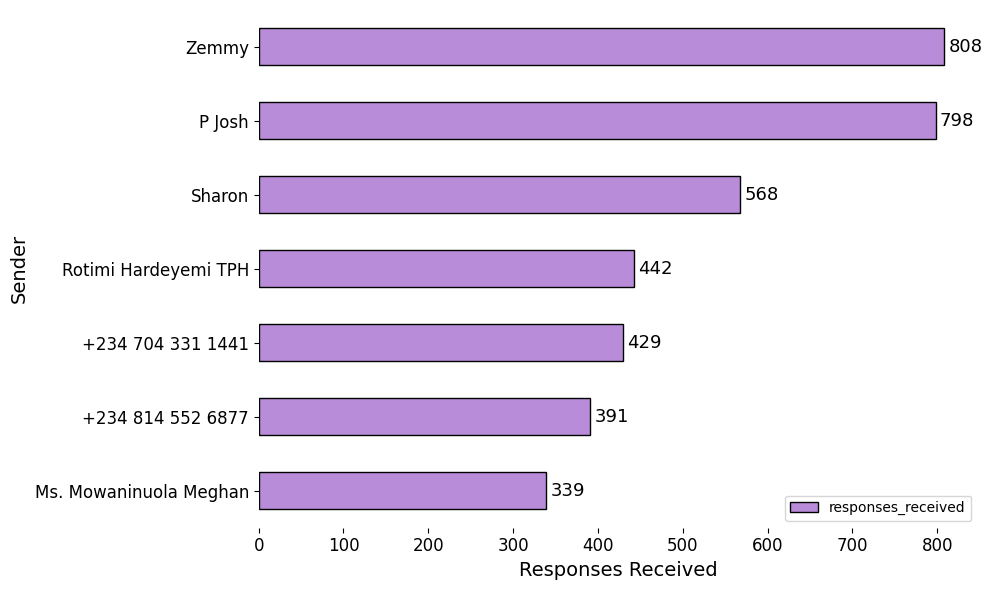

In [64]:
import matplotlib.pyplot as plt

# Assuming response_data is your DataFrame and it has been sorted as shown
top_7_senders = response_counts.sort_values('responses_received', ascending=False).head(7)

# Set figure size before plotting
plt.figure(figsize=(10, 6), facecolor='none')

# Create the horizontal bar plot
ax = top_7_senders.plot(
    x='Sender', y='responses_received', kind='barh', color='#b98cd9',
    edgecolor='black', ax=plt.gca()
)

# Labels
plt.xlabel('Responses Received', fontsize=14)
plt.ylabel('Sender', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invert y-axis to have highest at top
plt.gca().invert_yaxis()

# Annotate each bar with the number of responses received (larger font)
for index, value in enumerate(top_7_senders['responses_received']):
    ax.text(value + 5, index, str(value), va='center', fontsize=13)

# Remove border lines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Adjust layout and save
plt.tight_layout()
top7_senders_path = '/content/drive/My Drive/TPH Data Analysis/top7_senders.png'
plt.savefig(top7_senders_path, format='png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()


Interpretation:

High "responses_received" = people whose messages prompt discussion (e.g., leaders, moderators, question-askers).

4. Let's find response ratio (i.e., how likely a sender gets a reply per message sent) and visualize it.


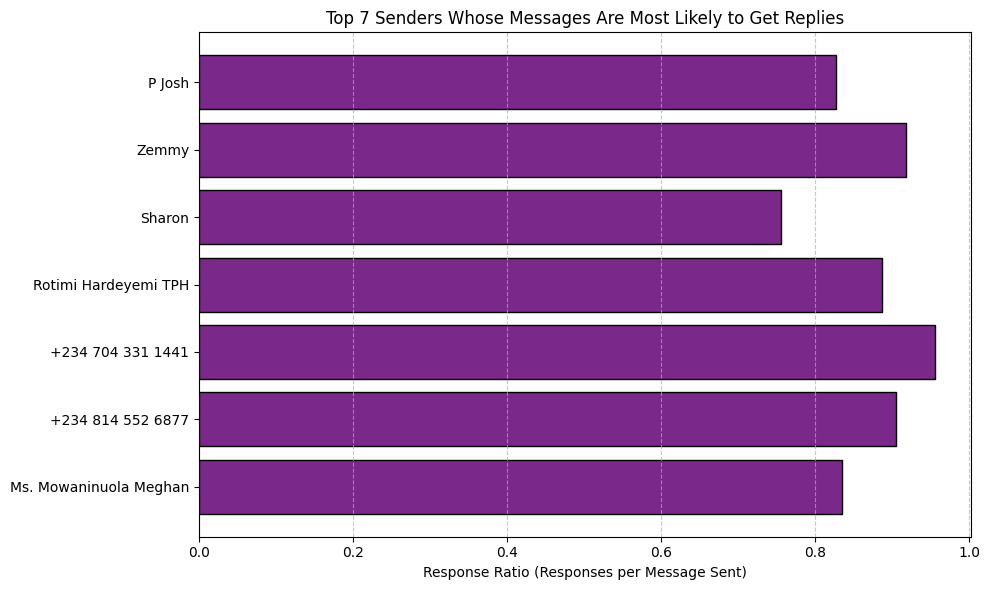

In [65]:
# Step 1: Get messages sent and responses received per sender
message_counts = df['Sender'].value_counts().rename_axis('Sender').reset_index(name='messages_sent')

# Merge
response_data = pd.merge(message_counts, response_counts, on='Sender', how='left').fillna(0)
response_data['response_ratio'] = response_data['responses_received'] / response_data['messages_sent']

# Plot top 10 senders with highest response ratios
top_responded = response_data.head(7)

plt.figure(figsize=(10, 6))
plt.barh(top_responded['Sender'], top_responded['response_ratio'], color='#7A288A', edgecolor='black')
plt.xlabel('Response Ratio (Responses per Message Sent)')
plt.title('Top 7 Senders Whose Messages Are Most Likely to Get Replies')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save this matplotlib plot to Google Drive
top7senders_byresponseratio_path = '/content/drive/My Drive/TPH Data Analysis/top10senders_byresponseratio.png'
plt.savefig(top7senders_byresponseratio_path, format='png')

plt.show()



Interpretation Guide

1.0 = Every message gets a reply

Above 0.5 = Most messages spark discussion

Below 0.3 = Less interactive or more informational messages

## Member Participation


1. What percentage of group members actively participate in discussions out of 274 members?

To calculate what percentage of the 274 group members actively participate in discussions, let's use the number of unique senders (people who actually sent messages) as a proxy for “active participants.”




In [66]:
# Step 1: Total number of group members
total_members = 274

# Step 2: Get number of active members (who sent at least 1 message)
active_members = df['Sender'].nunique()

# Step 3: Calculate participation percentage
participation_rate = (active_members / total_members) * 100

print(f"Active Members: {active_members}")
print(f"Participation Rate: {participation_rate:.2f}%")


Active Members: 231
Participation Rate: 84.31%


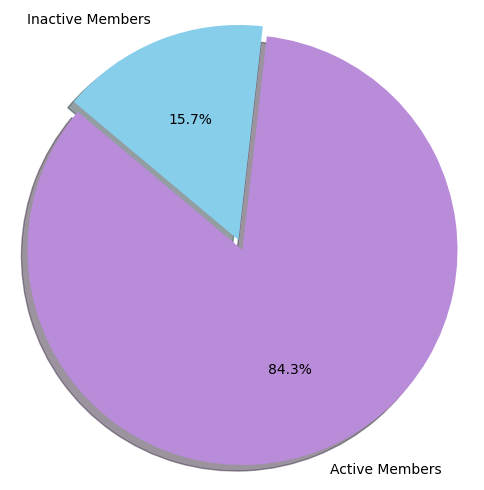

In [67]:
import matplotlib.pyplot as plt

# Total members in the group
total_members = 274

# Number of members who sent at least one message
active_members = df['Sender'].nunique()

# Inactive members = total - active
inactive_members = total_members - active_members

# Pie chart values and labels
labels = ['Active Members', 'Inactive Members']
sizes = [active_members, inactive_members]
colors = ['#b98cd9', 'skyblue']
explode = (0.05, 0)  # Slightly explode the "Active" slice

# Create pie chart
plt.figure(figsize=(5, 5), facecolor='none')
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140, shadow=True)
#plt.title('Group Participation (Active vs. Inactive Members)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()

# Save this matplotlib plot to Google Drive
group_participation_path = '/content/drive/My Drive/TPH Data Analysis/group_partcipation.png'
plt.savefig(group_participation_path, format='png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()
